## Observations and Insights 

Obsveration 1: 

The gender split amongst all of the mice in the program is almost completely equal with 50.2% female and 49.8% male. 

Observation 2:

It appears based on looking at a random mouse in the Capomulin trial that tumor volume and mouse weight are strongly correlated. 

Observation 3: 

It appears that Capomulin and Ramicane are the two most promising drugs as they resulted in the smallest average tumor size when the mice ended their trials. 


In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results = study_results.merge(mouse_metadata, how='left', on = 'Mouse ID')
study_results
# Display the data table for preview
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice = study_results['Mouse ID'].count()
print(f'The number of mice is {mice}.')

The number of mice is 1893.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups = study_results.duplicated(['Mouse ID','Timepoint'], keep = False)
no_dups = study_results[dups]
no_dups.head(30)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#See above - combined into one line.



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results = study_results.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep = False)
clean_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice = clean_results["Mouse ID"].count()
print(f'The number of unique mice are {unique_mice}.')

The number of unique mice are 1883.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stats = clean_results.groupby("Drug Regimen")['Tumor Volume (mm3)']
tumor_mean = stats.mean()
tumor_median = stats.median()
tumor_var = stats.var()
tumor_sdev = stats.std()
tumor_sem = stats.sem()
summary_stats = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance':tumor_var,
                              'Std Dev':tumor_sdev, 'SEM': tumor_sem                             
                             }).round(2)
summary_stats



,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_results.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}).round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.46  50.85  44.05  6.64  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

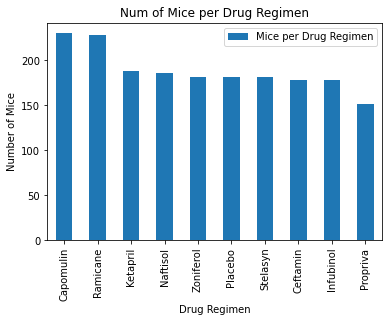

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
plt.title("Num of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
num_mice = clean_results['Drug Regimen'].value_counts()
num_mice.plot(kind='bar', label="Mice per Drug Regimen")
plt.legend(loc='best')


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text major ticklabel objects>)

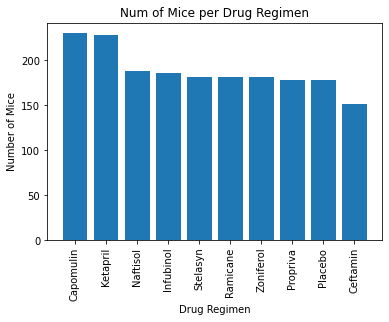

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = clean_results['Drug Regimen'].unique()
values = clean_results['Drug Regimen'].value_counts()

plt.bar(drugs,values)
plt.title("Num of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(drugs,rotation = 90)
plt.xticks()

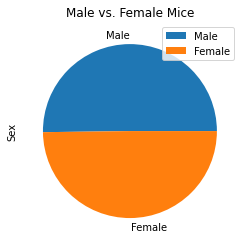

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_results.drop_duplicates(subset=['Mouse ID'])
plt.title("Male vs. Female Mice")
gender = mice_gender['Sex'].value_counts()
gender.plot(kind='pie')
plt.legend(loc='best')


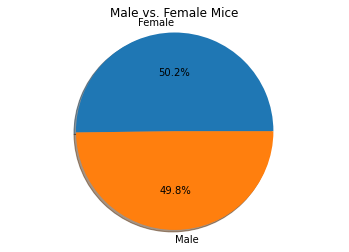

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = mice_gender['Sex'].unique()
sizes = gender

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Male vs. Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxm = clean_results.groupby('Mouse ID')['Timepoint'].max()
time = maxm.to_frame().reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_time = pd.merge(clean_results, time, how='right')
final_time.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    summary = final_time.loc[(final_time['Drug Regimen'] == treatment)]
    
    # add subset 
    tumor_vols.append(summary[['Mouse ID', 'Drug Regimen','Tumor Volume (mm3)']])
    
    # Determine outliers using upper and lower bounds
    q1 = summary['Tumor Volume (mm3)'].quantile(0.25)
    q3 = summary['Tumor Volume (mm3)'].quantile(0.75)
    iqr = q3 - q1
    lower = round(q1 - (1.5 * iqr),3)
    upper = round(q3 + (1.5*iqr),3)
    
    print(f'For {treatment}, values below {lower} and above {upper} would be considered outliers.')

For Capomulin, values below 20.705 and above 51.832 would be considered outliers.
For Ramicane, values below 17.913 and above 54.307 would be considered outliers.
For Infubinol, values below 36.833 and above 82.741 would be considered outliers.
For Ceftamin, values below 25.355 and above 87.666 would be considered outliers.


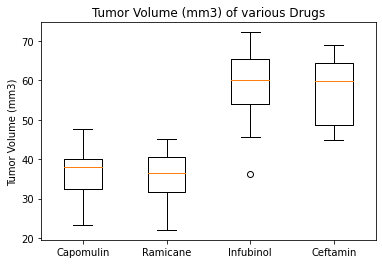

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capo = pd.DataFrame(tumor_vols[0])
rami = pd.DataFrame(tumor_vols[1])
infu = pd.DataFrame(tumor_vols[2])
ceft = pd.DataFrame(tumor_vols[3])

data = [capo['Tumor Volume (mm3)'],rami['Tumor Volume (mm3)'],infu['Tumor Volume (mm3)'],ceft['Tumor Volume (mm3)']]
fig7, ax7 = plt.subplots()
ax7.set_title('Tumor Volume (mm3) of various Drugs')
ax7.boxplot(data)
plt.xticks([1,2,3,4],treatments)
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

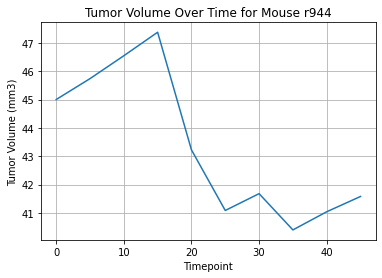

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_results.loc[clean_results['Drug Regimen'] == 'Capomulin']
capomulin_sing = capomulin.loc[capomulin['Mouse ID'] == 'r944']

fig, ax = plt.subplots()
ax.plot(capomulin_sing['Timepoint'], capomulin_sing['Tumor Volume (mm3)'])

ax.set(xlabel='Timepoint', ylabel='Tumor Volume (mm3)',
       title='Tumor Volume Over Time for Mouse r944')
ax.grid()


Text(0.5, 1.0, 'Average Tumor Volume vs Average Weight')

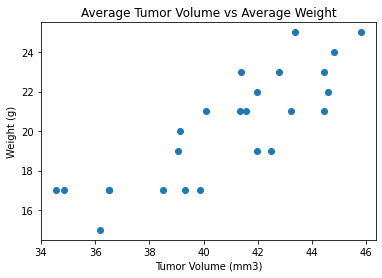

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_avg = capomulin.groupby('Mouse ID').mean()
x = tumor_avg['Tumor Volume (mm3)']
y = tumor_avg['Weight (g)']
plt.scatter(x, y)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Average Tumor Volume vs Average Weight')

## Correlation and Regression

Text(35, 22, 'R^2 value is 0.71')

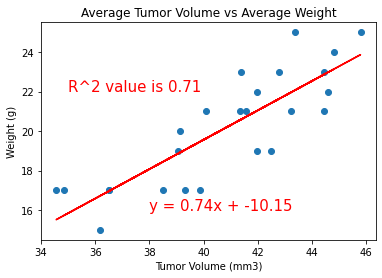

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.title('Average Tumor Volume vs Average Weight')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(38,16),fontsize=15,color="red")
plt.annotate(f'R^2 value is {round(rvalue**2,2)}',(35,22),fontsize=15,color="red")
